# Predicting the value of a diamond

## Table of Contents

- [Introduction](#Introduction)
  - [Dataset Source](#Dataset-Source)
  - [Dataset Details](#Dataset-Details)
  - [Dataset Features](#Dataset-Features)
  - [Target Feature](#Target-Feature)
- [Goals and Objectives](#Goals-and-Objectives)
- [Data Cleaning and Preprocessing](#clean-process)
  - [Data Retrieval](#retrieval)
  - [Data Cleaning](#cleaning)
  - [Random Sampling](#sampling)


## Introduction <a id=Introduction></a>
### Dataset Source <a id=Dataset-Source></a>
The Diamonds dataset was sourced from the dataset collection at from the [RMIT Mathematics of computing library](https://github.com/vaksakalli/datasets/), where it was in turn collected from the ggplot2 R library. It also exists on the [Kaggle database](https://www.kaggle.com/shivam2503/diamonds), however whether it was sourced here or mirrored from the ggplot2 library is unknown. The Kaggle source contains useful clarifications about the exact meaning of each feature, which we have drawn upon for this analysis. The dataset contains the sale prices of diamonds, and a number of features for each diamond, such as carat, clarity, cut, colour, and size

### Dataset Details <a id=Dataset-Details></a>
The dataset is about the details of various diamonds that have been sold on the market, including details about their sale price, and factors that may affect the price, such as cut, colour, size, measured in the industry standard metrics of depth and table, clarity and carat. It also specifies the diamond’s dimensions as measured in x, y, z. These features contain all the usual metrics used by the professional world to determine a diamond’s worth, so it should be sufficient for the modelling of it as a regression problem.

This dataset has a total of 10 features with 53940 observations. 


### Dataset Features <a id=Dataset-Features></a>
The features of our dataset are described in the following table, as well as using two explanatory diagrams taken from [Brilliance](https://www.brilliance.com/education/diamonds/depth-table) to explain depth and table.

Feature name | Data Type | Units | Description
-------------|-----------|-------|------------
price|Numeric|US Dollars| The price the diamond sold for in US dollars
carat|Numeric|Carat|The weight of the diamond in carats. One carat is equivalent to 200mg
cut|Ordinal Categorical|NA|The cut quality of the diamond. Described in increasing order as Fair, Good, Very Good, Premium, Ideal
color|Ordinal Categorical|NA|The color of the diamond, with D being the best and J being the worst
clarity|Ordinal Categorical|NA|The severity of natural flaws within the diamond. Described in increasing order as I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
x|Numeric|Millimetres|The x length in millimetres
y|Numeric|Millimetres|The y length in millimetres
z|Numeric|Millimetres|The y length in millimetres
depth|Numeric|Percentage|The ratio between the z dimension and the average of x and y. Calculated as z / mean(x, y). See attached image
table|Numeric|Percentage| The ratio between the top of the diamond and the average of x and y. Calculated as top / mean(x, y). See attached image

 #### Table Explanatory diagram <a id=Table-Explanatory-diagram></a>
 ![Table Illustration](https://www.brilliance.com/front/img/diamond_table_percentage_0.67254899.jpg)

  #### Depth Explanatory diagram <a id=Depth-Explanatory-diagram></a>
 ![Depth Illustration](https://www.brilliance.com/front/img/what_is_depth_percentage.7860a14c.png)

### Target Feature <a id=Target-Feature></a>
For this project, the target feature in this dataset will be the diamond price in US dollars. Therefore, we aim to predict the price of diamonds based on the explanatory variables

## Goals and Objectives <a id=Goals-and-Objectives></a>
The diamond market is very competitive, with large companies exchanging vast amounts in capital and diamonds. Therefore, a model which could accurately predict a diamond's price could have uses for both suppliers and buyers: 

For the suppliers, the ability to accurately predict the price of a diamond before sale would give them the ability to better predict their cashflow, improving their ability to do business. 

For buyers, such a model would allow them to ensure they are not overpaying for diamonds, allowing them to be more confident in their purchases.

Therefore, the aim for this project is to produce a model that can accurately predict the price of a diamond based on the publicly available metrics for classifying diamonds.

We also at this point make the assumption that the prices of all diamonds within this dataset are independent. This may not be a realistic assumption, since professionals tend to use price relative to previous, similar diamonds as a measure of worth, but doing so allows us to use classical predictive models such as multiple linear regression.

## Data Cleaning and Preprocessing <a id=clean-process></a>
In this section, we go through the data cleaning and preprocessing steps taken to prepare the data in this project.

### Data Retrieval <a id=retrieval></a>
- We load the modules required for this report.
- We read in the dataset from diamonds.csv.
- We display 10 randomly sampled rows from the report to get an idea of what our data looks like.

In [23]:
###Loading modules###
import numpy as np
import pandas as pd

#used to get the csv from the repository
import requests

#used to generate tables to check data
from IPython.display import display, HTML

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Display all columns
pd.set_option('display.max_columns', None) 

# Set precision
pd.set_option("display.precision", 3)

###Reading dataset as a dataframe###
df_name = 'diamonds.csv'
diamonds_df = pd.read_csv(df_name)

###Displaying 10 random rows###
diamonds_df.sample(10, random_state=405)

,carat,cut,color,clarity,depth,table,x,y,z,price
36187,0.41,Very Good,F,VS1,63.0,57.0,4.66,4.70,2.95,931
51096,0.71,Very Good,G,VS2,62.3,63.0,5.70,5.64,3.53,2335
2414,0.87,Very Good,H,SI1,62.2,57.0,6.05,6.11,3.78,3180
2136,0.71,Ideal,G,VS1,61.8,56.1,5.72,5.74,3.54,3123
47156,0.45,Ideal,F,VVS1,61.8,55.0,4.92,4.95,3.05,1833
11719,0.34,Ideal,E,SI1,61.4,54.0,4.50,4.53,2.77,596
51509,0.74,Premium,F,SI2,59.2,60.0,5.96,5.90,3.51,2383
27566,2.40,Ideal,H,SI2,62.0,55.0,8.57,8.60,5.32,18374
33746,0.31,Ideal,F,VVS1,62.0,55.0,4.34,4.37,2.70,840
35068,0.32,Very Good,F,VVS1,61.5,56.0,4.38,4.40,2.70,886


### Data Cleaning <a id="cleaning"></a>
- Drop irrelevant columns from our dataset.
- Verify that all columns are labelled properly.
- Check for missing values and remove rows that have missing values.
- Random sampling of 5k rows?

First, we will display all column names too see whether any columns need to be dropped.

In [24]:
#displays all columns
diamonds_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

`x`, `y` and `z` represent the lengths of each dimension of the diamond which is redundant as `depth` and `table` are provided and are the industry standard way of measuring diamonds size. Because of this we will drop `x`, `y` and `z`.

In [25]:
#Dropping x y z columns
diamonds_df = diamonds_df.drop(columns=['x', 'y', 'z'])
#Display remaining columns
diamonds_df.sample(10, random_state = 405)

,carat,cut,color,clarity,depth,table,price
36187,0.41,Very Good,F,VS1,63.0,57.0,931
51096,0.71,Very Good,G,VS2,62.3,63.0,2335
2414,0.87,Very Good,H,SI1,62.2,57.0,3180
2136,0.71,Ideal,G,VS1,61.8,56.1,3123
47156,0.45,Ideal,F,VVS1,61.8,55.0,1833
11719,0.34,Ideal,E,SI1,61.4,54.0,596
51509,0.74,Premium,F,SI2,59.2,60.0,2383
27566,2.40,Ideal,H,SI2,62.0,55.0,18374
33746,0.31,Ideal,F,VVS1,62.0,55.0,840
35068,0.32,Very Good,F,VVS1,61.5,56.0,886


Fortunately, all our column names are already correct we can now check to make sure all of our columns data types are the types we intended.

In [26]:
# Check for data types
print(f"Shape of the dataset = {diamonds_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(diamonds_df.dtypes)

Shape of the dataset = (53940, 7) 

Data types are below where 'object' indicates a string type: 
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
dtype: object


Next, we will check all our categorical columns for their unique values and ensure that all entries are valid.

In [27]:
#all cols that contain catergorical data (object = string)
catCols = diamonds_df.columns[diamonds_df.dtypes==object].tolist()

for col in catCols:
    print(f"All unique vals in {col}")
    print(f"{diamonds_df[col].unique()}\n")

All unique vals in cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

All unique vals in color
['E' 'I' 'J' 'H' 'F' 'G' 'D']

All unique vals in clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



All the unique values are valid and so we can move on.

Next, we will check for outliers in our numerical data by generating a summary of our statistics. From looking at this we can determine that there are no outliers present that we need to act on.

In [28]:
#displays mean, standard dev, min, max, 25q, 50q and 75q
display(HTML('<b>Table: Summary of numerical features</b>'))
diamonds_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.798,0.474,0.2,0.4,0.7,1.04,5.01
depth,53940.0,61.749,1.433,43.0,61.0,61.8,62.50,79.00
table,53940.0,57.457,2.234,43.0,56.0,57.0,59.00,95.00
price,53940.0,3932.800,3989.440,326.0,950.0,2401.0,5324.25,18823.00


Missing values are checked by displaying the number of missing values in every column. We observe that fortunately there are no missing values in any column so we can continue.

In [29]:
#get num of missing values in each column
print(f"\nColumn:\t   Num missing:")
print(diamonds_df.isnull().sum())


Column:	   Num missing:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64


### Random Sampling <a id="sampling"></a>
We have 53940 clean rows so we will take a random sample of 5000 rows. Then we will display a random sample of 10 from the 5000 rows.

In [30]:
diamonds_df = diamonds_df.sample(5000, random_state = 405)
diamonds_df.sample(10, random_state = 405)

,carat,cut,color,clarity,depth,table,price
14074,1.03,Ideal,E,SI1,62.0,53.0,5710
32009,0.31,Very Good,F,VVS1,59.2,62.0,777
40757,0.40,Ideal,F,VVS2,62.8,56.0,1163
21811,1.66,Premium,J,VVS2,62.6,59.0,9882
32701,0.31,Ideal,F,VS2,61.6,55.0,802
50018,0.70,Very Good,F,SI1,59.8,60.0,2196
17483,1.10,Premium,G,VS2,59.4,60.0,7022
24064,1.70,Ideal,I,VS1,60.1,57.0,12209
36964,0.41,Premium,G,VS1,62.5,59.0,961
45110,0.54,Very Good,D,SI1,60.3,61.0,1650


## Data Exploration and Visualisation

Now the dataset has been cleaned and is ready for use for exploring and visualising the features of the data.

### Univariate visualisation

#### Bar chart of cut type

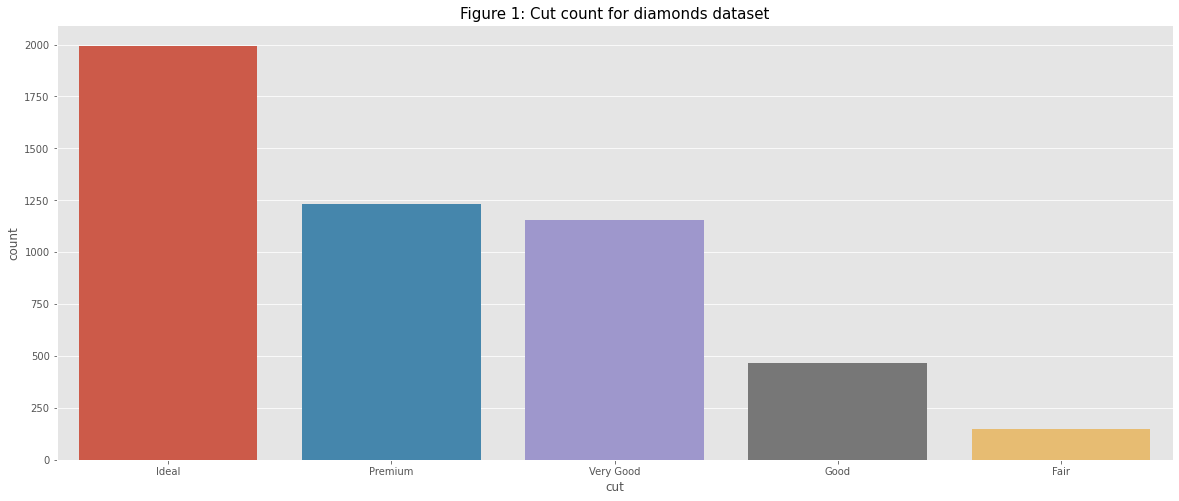

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'cut', data = diamonds_df, order = diamonds_df['cut'].value_counts().index)
fig = plt.title('Figure 1: Cut count for diamonds dataset', fontsize = 15)
plt.show()

#### Bar chart of color

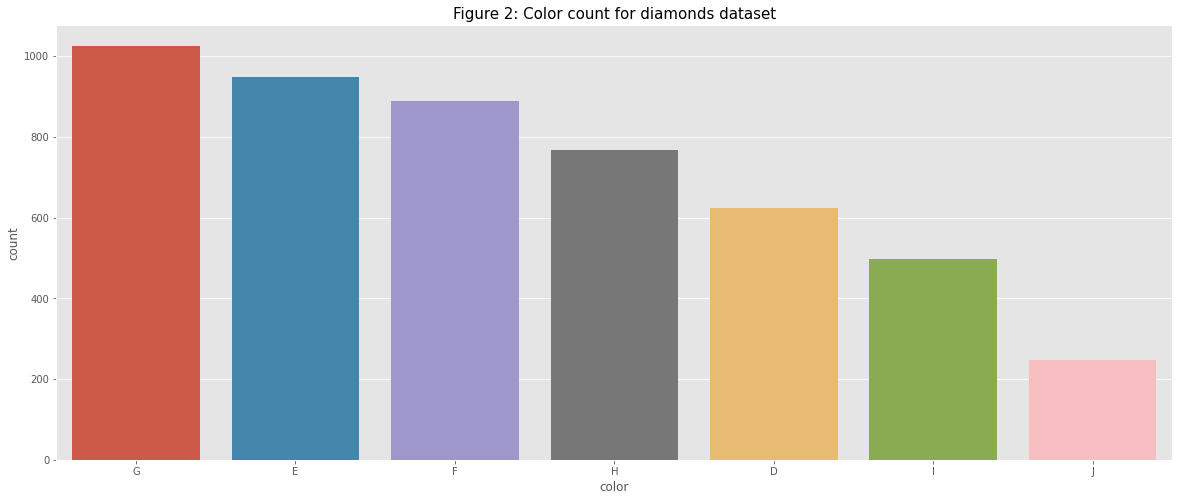

In [32]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'color', data = diamonds_df, order = diamonds_df['color'].value_counts().index)
fig = plt.title('Figure 2: Color count for diamonds dataset', fontsize = 15)
plt.show()

#### Bar chart of clarity

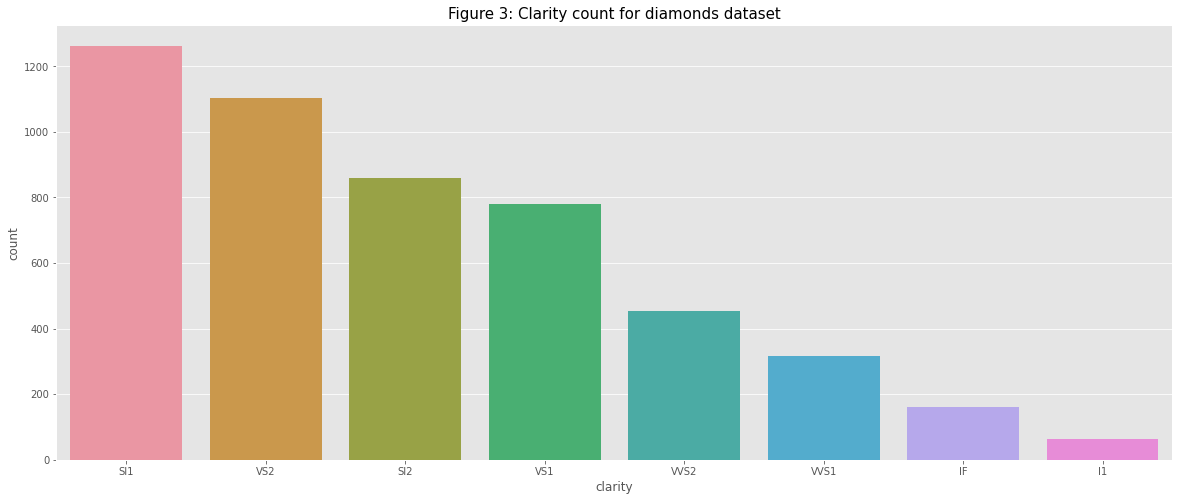

In [33]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'clarity', data = diamonds_df, order = diamonds_df['clarity'].value_counts().index)
fig = plt.title('Figure 3: Clarity count for diamonds dataset', fontsize = 15)
plt.show()

#### Histogram/Boxplot of price

<Figure size 1440x576 with 0 Axes>

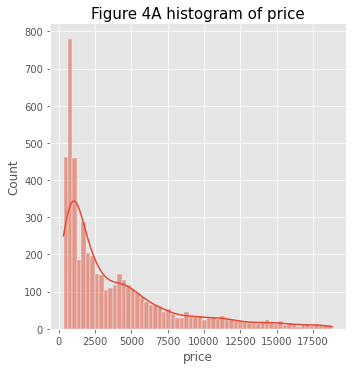

In [34]:
plt.figure(figsize = (20,8))
fig = sns.displot(diamonds_df['price'], kde = True, bins = 60)
fig = plt.title('Figure 4A histogram of price', fontsize = 15)
plt.show()

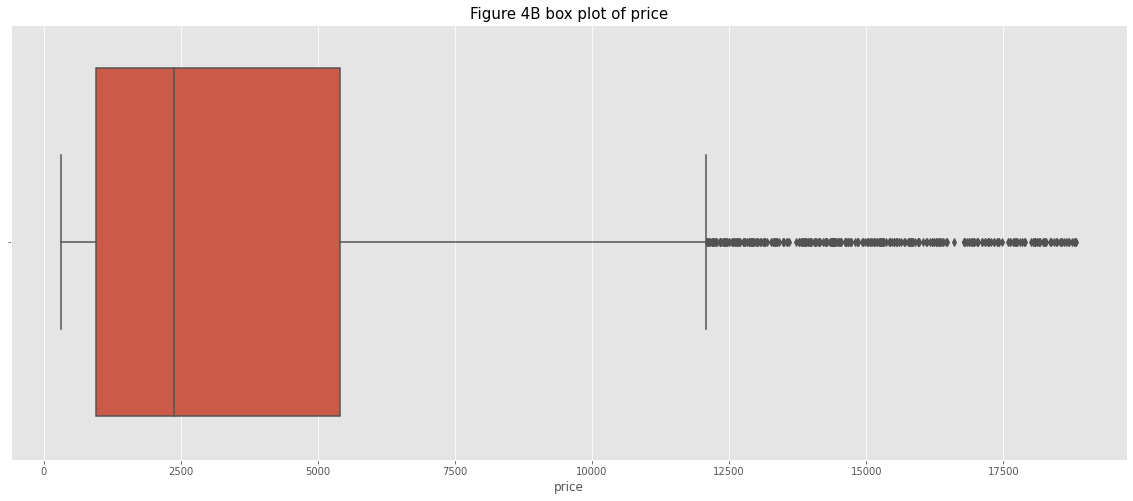

In [35]:
plt.figure(figsize = (20,8))
fig = sns.boxplot(diamonds_df['price'])
fig = plt.title('Figure 4B box plot of price', fontsize = 15)
plt.show()

### Bivariate visualisation

#### Scatterplot of price and carat weight

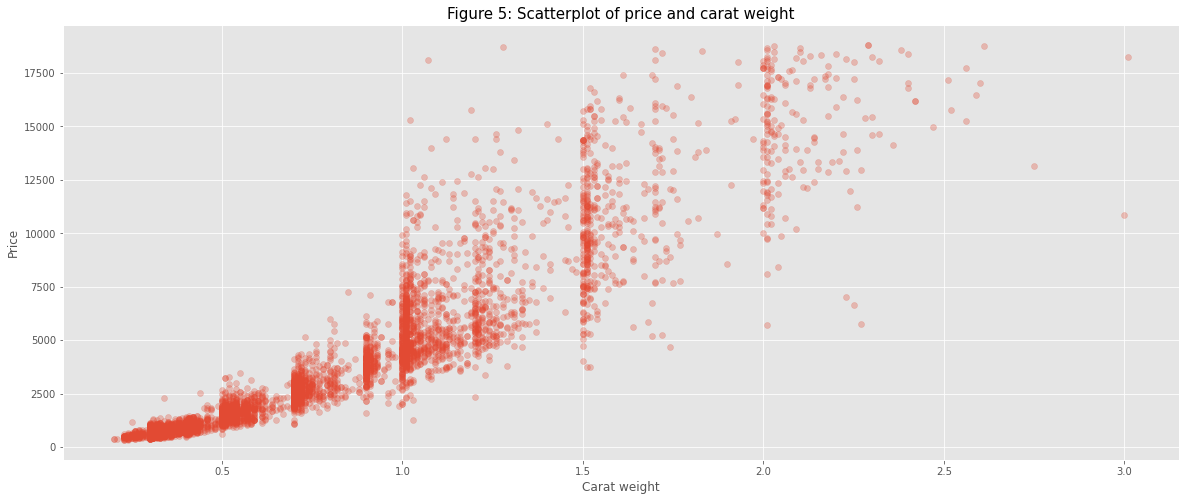

In [36]:
plt.figure(figsize = (20,8))
plt.scatter(diamonds_df['carat'], diamonds_df['price'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of price and carat weight', fontsize = 15)
plt.xlabel('Carat weight')
plt.ylabel('Price')
plt.show()

#### Boxplot of price by cut type

In [37]:
plt.figure(figsize = (20,8))
sns.boxplot(diamonds_df['cut'], diamonds_df['price']);
plt.title('Figure 6: Boxplot of price by cut', fontsize = 15)
plt.show()

#### Boxplot of price by color

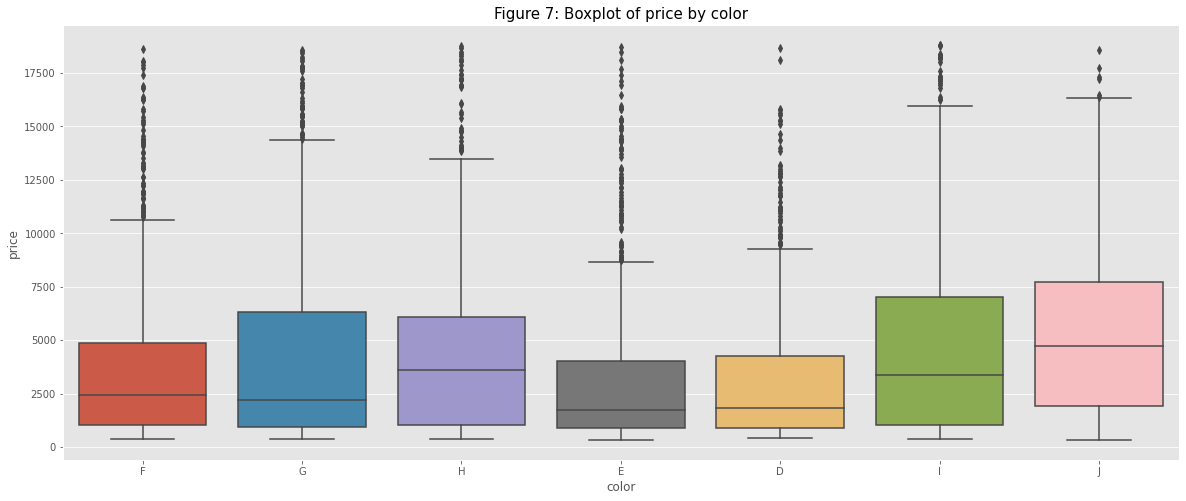

In [ ]:
plt.figure(figsize = (20,8))
sns.boxplot(diamonds_df['color'], diamonds_df['price']);
plt.title('Figure 7: Boxplot of price by color', fontsize = 15)
plt.show()

#### Boxplot of price by clarity

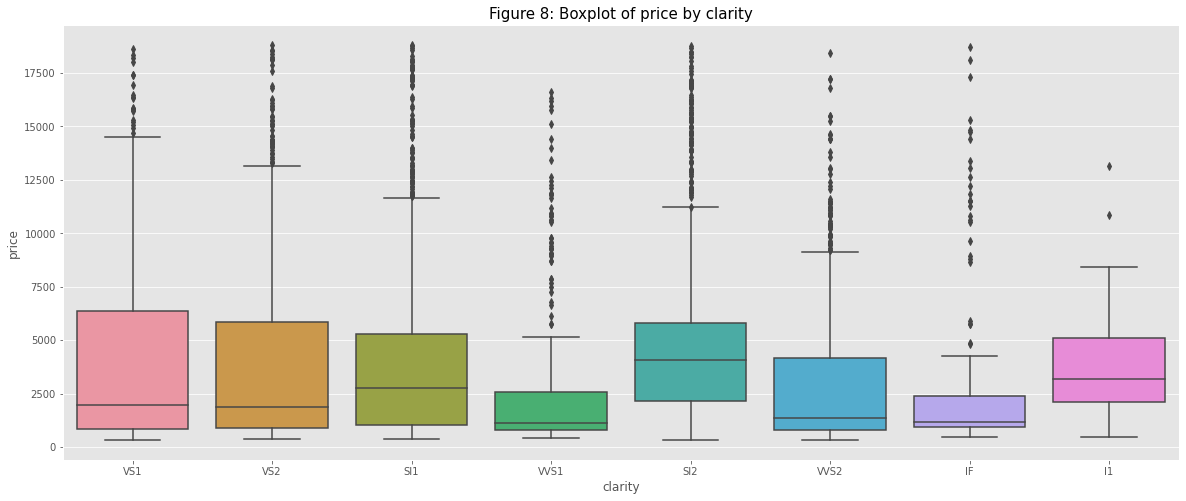

In [ ]:
plt.figure(figsize = (20,8))
sns.boxplot(diamonds_df['clarity'], diamonds_df['price']);
plt.title('Figure 8: Boxplot of price by clarity', fontsize = 15)
plt.show()

#### Boxplot of price by depth

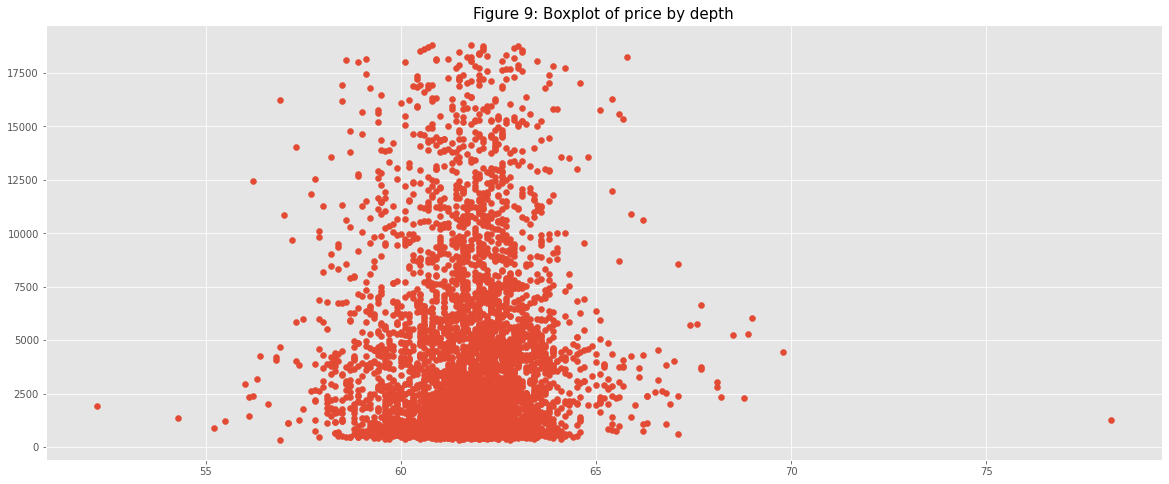

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(diamonds_df['depth'], diamonds_df['price']);
plt.title('Figure 9: Boxplot of price by depth', fontsize = 15)
plt.show()

#### Boxplot of price by table

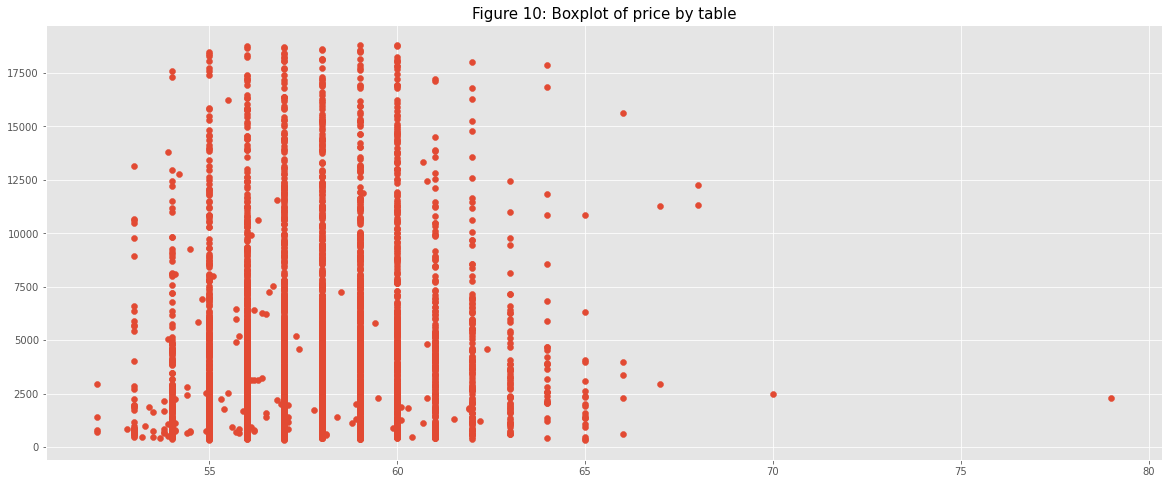

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(diamonds_df['table'], diamonds_df['price']);
plt.title('Figure 10: Boxplot of price by table', fontsize = 15)
plt.show()

### Trivariate visualisation

#### Scatterplot of price by carat weight and color

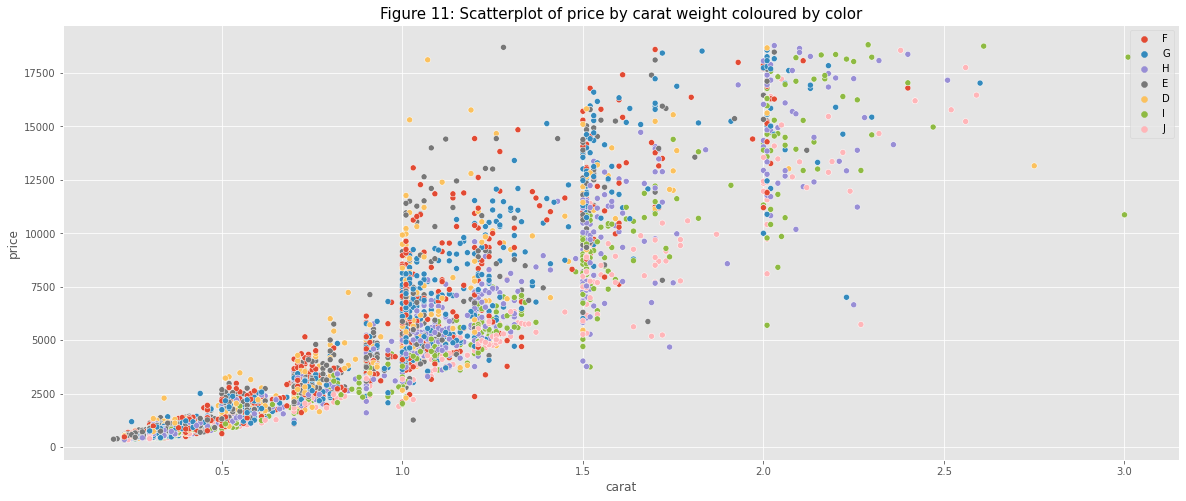

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(diamonds_df['carat'], diamonds_df['price'], hue = diamonds_df['color'])
plt.title('Figure 11: Scatterplot of price by carat weight coloured by color', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show()

## Conclusion
Accurate prediction of diamond prices is useful for both suppliers and buyers of diamonds, as both sides are able to use such predictions to make more reasonable predictions of future cash flow, and to allow them to ensure they are paying, or being paid, reasonable prices for their diamonds. Therefore, our goal for this project is to generate a reliable model for predicting house prices using the standard classification metrics for diamonds.

In Phase I of this project, we went through the process of cleaning and preprocessing our dataset. The data was quite clean and complete and as such we didn’t have to make too many modifications. We decided to drop three columns, the `x`, `y` and `z` columns which we considered to be non useful due to them being made redundant by the `depth` and `table` columns. We then checked to make sure that all our data was of the desired type, that all the unique values for each categorical value were valid and that there were no outliers or missing values in our data. Fortunately, we found that all our data was valid and so we took a sample of 30,000 random rows to slightly improve running time in the second phase while preserving as much of the data as possible.